1.For smooth function $$f(x)=\frac{1}{2}e^\frac{{-(x-.5)^2}}{2(.05)^2}$$

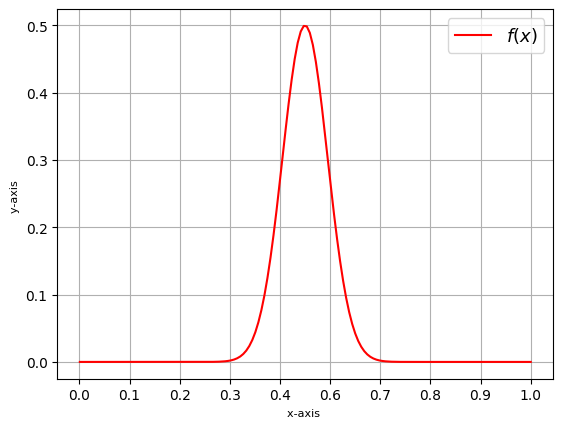

In [5]:
# @title
import numpy as np
from scipy.integrate import quad
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
n=150 #nodal points used to plot f(x)
a=0.001 #left endpoint of the interval (a,b) for the function f(x)
b=1 #right endpoint of the interval (a,b) for the function f(x)
c=0.0001 #left endpoint of the interval of (c,d) for the inversion
d=1 #right endpoint of the interval of (c,d) for the inversion
m=150 #nodal points used in the inversion
def f1(x):
    return (np.exp((-(x-.5)**2)/(2*(.05)**2))/2) #f1 is the given function f(x)
def f(x,t):
  return f1(x)*x
def g(t):
  integral,_=quad(f,1-t,1,args=(t,)) #g(t)=h_0(t)
  return integral
t1=np.linspace(a,b,n)
h=np.zeros(n)
for i in range(n):
  h[i]=g(t1[i])
h1=np.gradient(h,t1) #h1(t)=(h_0)^(1)(t)
def h2(t):
  return np.interp(t,t1,h1) #interpolating the function h1(t)=(h_0)^(1)(t)
def h3(t):
  return h2(1-t) #h3(t)=(h_0)^(1)(1-t)
def h4(t):
  return (h3(t)/t) #using the formula from example (6.1)
t2=np.linspace(c,d,m)
h5=np.zeros(m)
for i in range(m):
  h5[i]=h4(t2[i])
f2=np.zeros(n)
for i in range(n):
  f2[i]=f1(t1[i])
plt.plot(t1,f2,'r',label=r"$f(x)$") #plotting the actual function f(x)
plt.legend(fontsize=13)
plt.xlabel("x-axis ",fontsize=8)
plt.xticks(np.linspace(0,1,10),[f'{tick:.1f}' for tick in np.linspace(0,1,10)])
plt.ylabel("y-axis ",fontsize=8)
plt.grid(True)
plt.show()

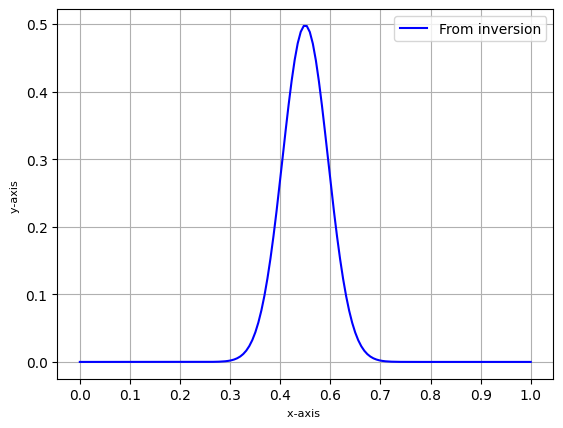

In [6]:
# @title
plt.plot(t2,h5,'b',label="From inversion") #plotting the function which is obtained from inversion
plt.legend(fontsize=9)
plt.xlabel("x-axis ",fontsize=8)
plt.xticks(np.linspace(0,1,10),[f'{tick:.1f}' for tick in np.linspace(0,1,10)])
plt.ylabel("y-axis ",fontsize=8)
plt.legend(fontsize=10)
plt.grid(True)
plt.show()

$2.$ For non smooth function $$f(x)=
\begin{cases}
     x^2(1-x)^2 & 0.3<x<0.6\\
     0 & \text{otherwise}
 \end{cases}    
$$

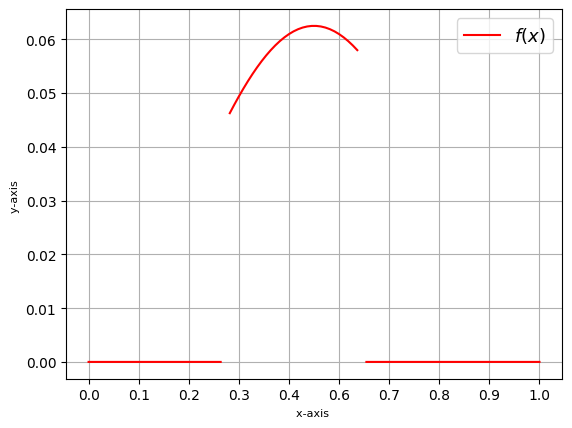

In [7]:
# @title
import numpy as np
from scipy.integrate import quad
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
n=100 #no of points used to plot f(x)
a=0 #left endpoint of the interval (a,b) for the function f(x)
b=1 #right endpoint of the interval (a,b) for the function f(x)
c=0.001 #left endpoint of the interval of (c,d) for the inversion
d=1 #right endpoint of the interval of (c,d) for the inversion
m=150 #no of points used in the inversion
def f1(x):
    if 0.3<x<0.6:
      return (x**2)*((1-x)**2)
    return 0 #f1 is the given function f(x)
def f(x,t):
  return f1(x)*x
def g(t):
  integral,_=quad(f,1-t,1,args=(t,)) #g(t)=h_0(t)
  return integral
t1=np.linspace(a,b,n)
h=np.zeros(n)
for i in range(n):
  h[i]=g(t1[i])
h1=np.gradient(h,t1) #h1(t)=(h_0)^(1)(t)
def h2(t):
  return np.interp(t,t1,h1) #interpolating the function h1(t)=(h_0)^(1)(t)
def h3(t):
  return h2(1-t) #h3(t)=(h_0)^(1)(1-t)
def h4(t):
  return (h3(t)/t) #using the formula from Example 6.1
t2=np.linspace(c,d,m)
h5=np.zeros(m)
for i in range(m):
  h5[i]=h4(t2[i])
f2=np.zeros(n)
for i in range(n):
  f2[i]=f1(t1[i])
diffs = np.diff(f2)
f2[1:][np.abs(diffs) > 0.02] = np.nan
plt.plot(t1,f2,'r',label=r"$f(x)$") #plotting the actual function f(x)
plt.legend(fontsize=13)
plt.xlabel("x-axis ",fontsize=8)
plt.xticks(np.linspace(0,1,10),[f'{tick:.1f}' for tick in np.linspace(0,1,10)])
plt.ylabel("y-axis ",fontsize=8)
plt.grid(True)
plt.show()

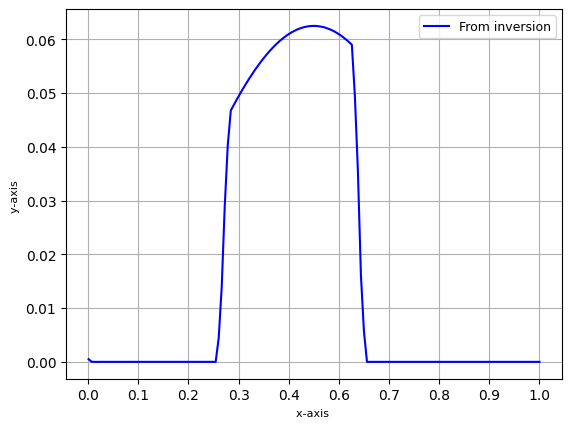

In [8]:
# @title
plt.plot(t2,h5,'b',label="From inversion") #plotting the function which is obtained from inversion
plt.legend(fontsize=9)
plt.xlabel("x-axis ",fontsize=8)
plt.xticks(np.linspace(0,1,10),[f'{tick:.1f}' for tick in np.linspace(0,1,10)])
plt.ylabel("y-axis ",fontsize=8)
plt.grid(True)
plt.show()